In [17]:
import os
import tensorflow as tf
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pickle
from keras import Sequential
from keras.layers import *
from keras.utils import plot_model
from keras.callbacks import EarlyStopping
import datetime as dt
import sys
from keras.models import load_model
from sklearn.utils import shuffle
from math import ceil
import cvzone
from cvzone.SelfiSegmentationModule import SelfiSegmentation
from PIL import Image




seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

SEQUENCE_LENGTH = 25
IMAGE_HEIGHT,IMAGE_WIDTH = 220, 340
CLASSES_LIST = ['away','map','photo','trap','son','where','breakfast','deaf','bright']

# data_dir = os.path.join('datasets','argentinian')
data_dir = os.path.join('datasets','Augmented')
CLASS_DICT = {index : sign for index,sign in enumerate(os.listdir(data_dir))}

In [18]:
model = load_model('models/SignLang3_model_classes=9__Loss_0.034486573189496994__Accuracy_0.9911110997200012_with_colorAugmentation(3600, 25, 220, 340, 1).keras')

In [5]:
segmentor = SelfiSegmentation(model=0)
backgrounds = np.array([img for img in os.listdir('backgrounds')])

def set_background():
    path = np.random.choice(backgrounds)
    back = cv2.imread(f'backgrounds/{path}')
    back = cv2.resize(back,(IMAGE_WIDTH,IMAGE_HEIGHT))
    
    return back

def replace_background(image,back):

    segmented_image = segmentor.removeBG(image,back,cutThreshold=0.05)
    
    return segmented_image

def prepro(frame):
    
    resized_frame = cv2.resize(frame,(IMAGE_WIDTH,IMAGE_HEIGHT))
    
    # segmented_image = replace_background(resized_frame,back)
    
    gray = cv2.cvtColor(resized_frame,cv2.COLOR_BGR2GRAY)
    
    normalized_frame = (gray/255).astype(np.float32)
    
    normalized_frame = np.expand_dims(normalized_frame,axis=2)
    
    return normalized_frame



In [32]:
cap = cv2.VideoCapture(0)

sequence = []
# back = set_background()

count =0
threshold = .9
ans = 'Initializing....'
while(cap.isOpened()):
    
    ret,frame = cap.read()
    
    if ret == True:
        
        if count %2 ==0:
            frame_processed = prepro(frame)

            sequence.append(frame_processed)

            if len(sequence) >SEQUENCE_LENGTH:
                sequence = sequence[1:]

            if len(sequence) == SEQUENCE_LENGTH:
                res = model.predict(np.expand_dims(sequence,axis=0))[0]
                ans = CLASSES_LIST[np.argmax(res)]
                print(ans)
                
        cv2.putText(frame,ans,(10,30),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
        cv2.imshow('feed',frame)
        count+=1
        if cv2.waitKey(5) == ord('q'):
            break
    else:
        break
        
        
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 61ms/step
son
1/1 [==============================] - 0s 62ms/step
son
1/1 [==============================] - 0s 65ms/step
son
1/1 [==============================] - 0s 63ms/step
son
1/1 [==============================] - 0s 63ms/step
son
1/1 [==============================] - 0s 60ms/step
son
1/1 [==============================] - 0s 62ms/step
away
1/1 [==============================] - 0s 62ms/step
away
1/1 [==============================] - 0s 63ms/step
away
1/1 [==============================] - 0s 63ms/step
away
1/1 [==============================] - 0s 62ms/step
away
1/1 [==============================] - 0s 61ms/step
away
1/1 [==============================] - 0s 64ms/step
away
1/1 [==============================] - 0s 63ms/step
away
1/1 [==============================] - 0s 62ms/step
away
1/1 [==============================] - 0s 62ms/step
away
1/1 [==============================] - 0s 63ms/step
away
1/1 [==============================] 

In [46]:
cap.release()
cv2.destroyAllWindows()

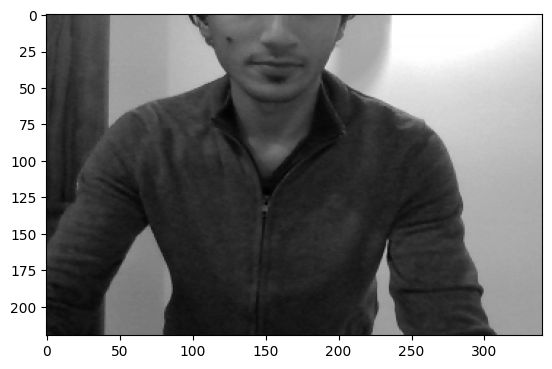

In [83]:
plt.imshow(frame_processed,cmap='gray')

In [19]:
def load_video(video_path):
    
    frames_list = []
    cap = cv2.VideoCapture(video_path)
    video_frames_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH),1)
    
    for frame_counter in range(SEQUENCE_LENGTH):

        cap.set(cv2.CAP_PROP_POS_FRAMES,frame_counter * skip_frames_window)
        
        ret,frame = cap.read()
        if not ret:
            break
            
        resized_frame = cv2.resize(frame,(IMAGE_WIDTH,IMAGE_HEIGHT))
        gray = cv2.cvtColor(resized_frame,cv2.COLOR_BGR2GRAY)
        normalized_frame = (gray/255.0).astype(np.float32)
        normalized_frame = np.expand_dims(normalized_frame,axis=2)
        
        frames_list.append(normalized_frame)
        
    cap.release()
    
    while len(frames_list) < SEQUENCE_LENGTH:
        frames_list.append(np.zeros(IMAGE_HEIGHT,IMAGE_WIDTH,1))
        
    return frames_list

In [24]:
frames= load_video('datasets/Augmented/map/234.mp4')
frames = np.expand_dims(frames,axis=0)
frames.shape

(1, 25, 220, 340, 1)

In [25]:
y_pred = model.predict(frames)

1/1 [==============================] - 0s 82ms/step


In [26]:
CLASSES_LIST[np.argmax(y_pred[0])]

'map'

In [58]:
for hehe in frames:
    # Process the frame
    
    # Display the frame
    cv2.imshow('Frame', hehe)
    cv2.waitKey(100)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

        
cap.release()
cv2.destroyAllWindows()